#**Péndulo simple**
El péndulo simple es otro sistema mecánico que muestra movimiento periódico y puede representarse por 
$$
 \frac{d^2\theta}{dt^2} + \omega_0^2\sin\theta = 0,
$$

donde $\omega_0 = \sqrt{\frac{g}{L}}$. Si consideramos $\theta$ pequeño ($\sin\theta\approx \theta$), el movimiento puede modelarse como un movimiento armónico simple.

La solución analítica de esta ecuación es: $$\theta = \theta_{max} sin(\omega_0 t)$$

Vamos a resolver el siguiente sistema $\theta''(t) = -\omega_0^2 sin\theta, \;\;\;\; \theta(0)=5°,\;\;\;\;\theta'(0) = 0$, usando los métodos vistos hasta el momento.


Encontrando una solución aproximada por medio del método de Euler, dado que la ecuación es de segundo orden, y el método de Euler es para ecuaciones de primer orden, re-escribimos la ecuación como dos ecuaciones lineales de primer orden acopladas,

$$
\begin{align}
 \frac{d\theta}{dt} =&\, \omega,\\
 \frac{d\omega}{dt} =&\, - \omega_0^2\sin\theta,
\end{align}
$$

#**Método de Euler**

$$\boxed{y_{n+1}=y_n+hf(x_n,y_n)}$$

El "*error local*" o "*error de truncamiento local*" mide a cada paso la cantidad por la cual la solución aproximada falla en satisfacer la ecuación diferencial en cada paso. Para deducir una fórmula para el error de truncamiento local del método de Euler, se usa la fórmula de Taylor con residuo. 

$$y(x_{n+1})=y_n+hf(x_n,y_n)+y^{\prime\prime}(c)\frac{h^2}{2}$$

Esta fórmula corresponde al método de Euler sin tener en cuenta el último término. Por lo tanto, el error de truncamiento local en $y_{n+1}$ es

$$\boxed{y^{\prime\prime}(c)\frac{h^2}{2}}, \,\,\,\,\,\,\, x_n \le c \le x_{n+1}$$


El error de truncamiento local para el método de Euler es $O(h^2)$; mientras que el error de truncamiento global es $O(h)$.

In [ ]:
from numpy import *
from matplotlib.pyplot import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd
from tabulate import tabulate

In [ ]:
# Solución analítica
theta_0 = np.deg2rad(5)
g = 9.8
L = 7
w0 = np.sqrt(9.8/L)

t = np.linspace(0, 10, 100)
xExacta = theta_0 *(np.cos(w0*t))


In [ ]:
# Euler
t = 0
tfin = 10
theta0 = np.deg2rad(5)
g = 9.8
L = 7
w0 = np.sqrt(9.8/L)
v0 =  0.0 
u = np.array([theta0, v0])

def f(t, u):         
    f1 = u[1] 
    f2 = -(g/L)*np.sin(u[0])
    return np.array([f1, f2])

tEuler = [t]
xEuler = [u[0]]
vEuler = [u[1]]
h = 0.01

while t < tfin:
  u = u + h* f(t,u)
  t = t + h

  xEuler.append(u[0])
  vEuler.append(u[1])
  tEuler.append(t)


#**Método de Euler mejorado (Euler Predictor–Corrector)**
El método es definido por las siguientes expresiones:

$$y^*_{n+1} = y_n + h f(x_n,y_n)\,\,\,\, \rightarrow\,\,\,\, Predictor$$  

$$y_{n+1} = y_n + h \frac{f(x_n,y_n) + f(x_{n+1},y^*_{n+1})}{2}\,\,\,\, \rightarrow\,\,\,\, Corrector$$

Este método es un ejemplo de un método de predicción-corrección. El valor de $y^*_{n+1}$ predice un valor de $y(x_n)$, mientras que el valor de $y_{n+1}$ corrige esta estimación. El error de truncamiento para el método de Euler mejorado es $O(h^3)$; por lo tanto, el error de truncamiento global es $O(h^2)$.


In [ ]:
#Euler Mejorado
# Euler
t = 0 
tfin = 10
theta0 = np.deg2rad(5)
g = 9.8
L = 7
w0 = np.sqrt(9.8/L)
v0 =  0.0 
u = np.array([theta0, v0])

def f(t, u):         
    f1 = u[1] 
    f2 = -(g/L) * np.sin(u[0])
    return np.array([f1, f2])

tEulerMej = [t]
xEulerMej = [u[0]]
vEulerMej = [u[1]]
h = 0.01

while t < tfin:
  uEuler = u + h* f(t,u)
  u = u + (h/2)*(f(t,u) + f(t+1,uEuler))
  t = t + h

  xEulerMej.append(u[0])
  vEulerMej.append(u[1])
  tEulerMej.append(t)
    

#**Método de Runge-Kutta de cuarto orden (RK4)**
Es uno de los procedimientos numéricos más populares, así como
más preciso, usado para obtener soluciones aproximadas para un problema con valores iniciales $y' = f(x,y)$, $y(x_0) = y_0$. 
Debido a que la solución aproximada concuerda con un polinomio de Taylor de cuarto grado, el error de truncamiento local para este método es $O(h^5)$, y así el error de truncamiento global es $O(h^4)$.

$$ 
\begin{align}
k_1 =&\, f\,(t_n,y_n)\\
k_2 =&\, f\left( t_n + \frac{h}{2}\,\,\,,\,\,\,y_n + \frac{1}{2}hk_1\right)\\
k_3 =&\, f\left( t_n + \frac{h}{2}\,\,\,,\,\,\,y_n + \frac{1}{2}hk_2\right)\\
k_4 =&\, f\left( t_n + h\,\,\,,\,\,\,y_n + hk_3\right)\\\\\\
y_{n+1} =\,& y_n + \frac{h}{6}( k_1 + 2k_2 + 2k_3 + k_4  )
 \end{align}
$$

In [ ]:
#Runge-Kutta de cuarto orden
t = 0 
tfin = 10
theta0 = np.deg2rad(5)
g = 9.8
L = 7
w0 = np.sqrt(9.8/L)
v0 =  0.0 
u = np.array([theta0, v0])

def f(t, u):         
    f1 = u[1] 
    f2 = -(g/L) * np.sin(u[0])
    return np.array([f1, f2])

trk4 = [t]
xrk4 = [u[0]]
vrk4 = [u[1]]
h = 0.01

while t < tfin:
  k1 = f(t,u)
  k2 = f(t + h/2 , u + h*k1/2)
  k3 = f(t + h/2 , u + h*k2/2)
  k4 = f(t + h, u + h*k3)
  u = u + (k1 + 2*(k2 + k3) + k4)*h/6
  t = t + h

  xrk4.append(u[0])
  vrk4.append(u[1])
  trk4.append(t)
    

#**Runge-Kutta-Fehlberg (RKF45)**
Este método emplea un método $O(h^4)$ junto con un método $O(h^5)$: 

$$ 
 \mathbf{y}_{i+1} = \mathbf{y}_{i}  + \frac{25}{216}\mathbf{k}_1 + \frac{1408}{2565}\mathbf{k}_3 + \frac{2197}{4104}\mathbf{k}_4 - \frac{1}{5}\mathbf{k}_5,
$$



$$
\mathbf{\tilde{y}}_{i+1} = \mathbf{y}_{i}  + \frac{16}{135}\mathbf{k}_1 + \frac{6656}{12825}\mathbf{k}_3 + \frac{28561}{56430}\mathbf{k}_4 - \frac{9}{50}\mathbf{k}_5 + \frac{2}{55}\mathbf{k}_6,
$$


Donde cada uno de los coeficientes, similar a RK4 son:

$$
\begin{eqnarray}
\mathbf{k}_1 &=& h\mathbf{f}\left(t_i, \mathbf{y}_i\right), \\
\mathbf{k}_2 &=& h\mathbf{f}\left(t_i + \frac{h}{4}, \mathbf{y}_i + \frac{\mathbf{k}_1}{4}\right),\\
\mathbf{k}_3 &=& h\mathbf{f}\left(t_i + \frac{3}{8}h, \mathbf{y}_i + \frac{3}{32}\mathbf{k}_1 + \frac{9}{32}\mathbf{k}_2\right),\\
\mathbf{k}_4 &=& h\mathbf{f}\left(t_i + \frac{12}{13}h, \mathbf{y}_i + \frac{1932}{2197}\mathbf{k}_1 - \frac{7200}{2197}\mathbf{k}_2 + \frac{7296}{2197}\mathbf{k}_3\right),\\
\mathbf{k}_5 &=& h\mathbf{f}\left(t_i + h, \mathbf{y}_i + \frac{439}{216}\mathbf{k}_1 - 8\mathbf{k}_2 + \frac{3680}{513}\mathbf{k}_3 - \frac{845}{4104}\mathbf{k}_4\right),\\
\mathbf{k}_6 &=& h\mathbf{f}\left(t_i + \frac{1}{2}h, \mathbf{y}_i - \frac{8}{27}\mathbf{k}_1 + 2\mathbf{k}_2 - \frac{3544}{2565}\mathbf{k}_3 + \frac{1859}{4104}\mathbf{k}_4 - \frac{11}{40}\mathbf{k}_5\right),
\end{eqnarray}
$$

Con este método es posible estimar y controlar el error en la solución, así como determinar automáticamente la longitud del paso con el que se hace la propagación para encontrar la solución aproximada, haciendo de éste un método eficiente para problemas de integración numérica de ecuaciones diferenciales ordinarias.


$$\text{error} =|y_{i+1} - y|$$

$$h_{new}=q*h_{old}, \,\,\,\,\,\,\,\,\,\,\, q=0.84\left(\frac{\epsilon h}{\text{error}}\right)^{\frac{1}{4}}
$$

In [ ]:
#Runge-Kutta-Felberger-RKF45 
def RKF45(f, y, t, tfinal, hmin = 0.001, hmax = 5., Tol = 1e-5):
    d  = len(y)         # tamaño del sistema de ecuaciones 
       
    h = hmax            # inicializar h al valor máximo 
    tt = t              # array 1 dim del tiempo
    Y  = np.array([y])  # array 2 dim con coords      

    while t < b:
        k1 = h*f(t, y)                
        k2 = h*f(t + h/4, y + k1/4)
        k3 = h*f(t + 3/8*h, y + 3/32*k1 + 9/32*k2)
        k4 = h*f(t + 12/13*h, y + 1932/2197*k1 - 7200/2197*k2 + 7296/2197*k3)
        k5 = h*f(t + h, y + 439/216*k1 - 8*k2 + 3680/513*k3 - 845/4104*k4)
        k6 = h*f(t + 1/2*h, y - 8/27*k1 + 2*k2 - 3544/2565*k3 + 1859/4104*k4 - 11/40*k5)

        #Se debe calcular el error
        error = (np.abs(k1/360 - 128/4275*k3 - 2197/75240*k4 + k5/50 + 2/55*k6)).max()

        # Aceptar or rechazar el paso de integración i+1 
        if (error/h < Tol): 
  
           y = y + 25/216*k1 + 1408/2565*k3 + 2197/4104*k4 - k5/5 #Solución aproximada
           t += h               # incremente en h el tiempo

           Y  = np.append(Y, np.array([y]), axis=0)
           tt = np.append(tt,t)                    
           
        #Se estima el h más óptimo para el siguiente paso 
        q = 0.84*(Tol*h/error)**0.25 # scalar a multiplicar h--> s*h
        
        if (q <= 0.1):
          h = 0.1*h   # (error grande) 0.1 es el mínimo valor impuesto para q
        elif (q >= 5):
          h = 5.*h    # 5 es el máximo valor impuesto para q
        else:
          h = q*h     # escalar h a q*h, paso ideal ( 0.1 < q < 5)
        
        if   (h > hmax): h = hmax  # no permitir h más grande que hmax
        elif (h < hmin): 
            print('(h no permitido.')
            break
            
        if (t+h > b): h = b - t    # garantizar que en el último paso t = b  
                    
    return Y.T, tt # output: arrays con coordenadas y tiempo para gráficar.


g = 9.8
L = 7
a, b = 0., 10.         # Intervalo [a,b] 
n = 100
w0 = np.sqrt(9.8/L)
theta0 = np.deg2rad(5)
v0 =  0.0 
u0 = np.array([theta0, v0])

def f(t, u):         
    f1 = u[1] 
    f2 = -(g/L) * np.sin(u[0])
    return np.array([f1, f2])

####### plot RKF45  #######
Y, t = RKF45(f, u0, a, b)     
yRKF45 = Y[0]
tRKF45 = t

#**Método de Verlet**
Utilizado para integrar ecuaciones diferenciales ordinarias de segundo orden con valores iniciales conocidos. Es apropiado en situaciones donde la expresión de la segunda derivada solo es función de las variables, dependiente o independiente, sin participar la primera derivada. 

$$y_{i+1} = 2y_i + y_{i-1} + f(y_i)(\Delta x)^2$$

$$y_{i-1}=y_0-y'_0\Delta x + \frac{1}{2}f(y_0)(\Delta x)^2$$

In [ ]:
#Método de Verlet
def verlet(f, a, b, xf, n): #a = y(0) , b = y'(0)
    dx = xf/(n-1) #tamaño del paso,  n: número de iteraciones
    xs = np.arange(0, xf+dx, dx) 
    ys = np.zeros(np.size(xs)) 

    g = 9.8
    L = 7
    theta0 = np.deg2rad(5)
    a, b = 0.075, 0.        
    n = 100
    w0 = np.sqrt(9.8/L)
   
    yinit = a - b*dx + 0.5*(-(g/L)*np.sin(theta0))*dx**2 # paso de arranque

    ys[0] = yinit
    ys[1] = a
    for i in range(1,n-1):
        ys[i+1] = 2*ys[i] -ys[i-1] + f(ys[i])*dx**2
    return xs, ys

def f(y):
  return -(g/L)*np.sin(y)
  
  
tf = 10
tVerlet, yVerlet = verlet(f, theta0, 0.0, 10, 100)


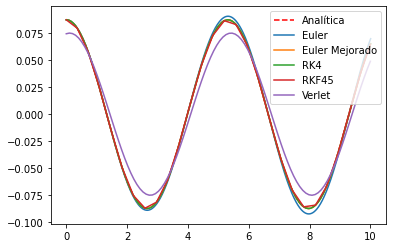

In [ ]:
#Gráficas
plt.plot(t,xExacta,'r--',label='Analítica')
plt.plot(tEuler,xEuler,label = 'Euler')
plt.plot(tEulerMej,xEulerMej,label = 'Euler Mejorado')
plt.plot(trk4,xrk4,label = 'RK4')
plt.plot(tRKF45, yRKF45, label = 'RKF45')
plt.plot(tVerlet, yVerlet, label = 'Verlet')
plt.legend()


In [ ]:
info = {'Tiempo [días]': t, 'Analítica': xExacta, 'Euler': xEuler, 'Euler mejorado': xEulerMej,'RK4': xrk4, 'RKF45': yRKF45,'Verlet': yVerlet}
print(tabulate(info, headers='keys', tablefmt='fancy_grid'))

╒═════════════════╤══════════════╤══════════════╤══════════════════╤══════════════╤══════════════╤══════════════╕
│   Tiempo [días] │    Analítica │        Euler │   Euler mejorado │          RK4 │        RKF45 │       Verlet │
╞═════════════════╪══════════════╪══════════════╪══════════════════╪══════════════╪══════════════╪══════════════╡
│        0        │  0.0872665   │  0.0872665   │      0.0872665   │  0.0872665   │  0.0872665   │  0.0743775   │
├─────────────────┼──────────────┼──────────────┼──────────────────┼──────────────┼──────────────┼──────────────┤
│        0.10101  │  0.0866439   │  0.0872665   │      0.0872604   │  0.0872604   │  0.0795825   │  0.075       │
├─────────────────┼──────────────┼──────────────┼──────────────────┼──────────────┼──────────────┼──────────────┤
│        0.20202  │  0.0847852   │  0.0872543   │      0.0872421   │  0.0872421   │  0.0578764   │  0.0745522   │
├─────────────────┼──────────────┼──────────────┼──────────────────┼──────────────┼─────

La librería **odeint** de scipy, ¿qué método se basa para resolver un sistema de ecuaciones diferenciales ordinarias? ✅

La clase **scipy.Integrate.solve_ivp** ¿qué método o (métodos) utiliza para resolver un sistema de ecuaciones diferenciales ordinarias? ✅